# Subsetter - Repositories Metrics Analysis

This jupyter notebook contains repositores metrics dataset analysis, including descriptive analysis, correlation analysis.

It also contains first iteration of minimal subset analysis, but it is by no means final version of it.

Script was run in [google colab](https://colab.google/). Local reproduction tutorial will appear during next project stage.

## Setup

!pip install ydata-profiling
!pip install typing-extensions --upgrade

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd

## Read data

In [2]:
path = 'data/metrics.json.zst' # change if needed, for repository - 'data/metrics.json.zst'
# load file
df = pd.read_json(path, dtype=True)
df = df.join(pd.json_normalize(df.pop('meta')))
df = df.join(pd.json_normalize(df.pop('metrics')))
df.drop(columns='commit', inplace=True)

In [3]:
with open('data/function_metrics.txt') as f:
        function_metrics_list = [l.strip() for l in f]

In [4]:
with open('data/struct_metrics.txt') as f:
        struct_metrics_list = [l.strip() for l in f]

In [5]:
with open('analysis/url_encoder.json') as f:
        urls_encoder = json.loads(f.read())
urls_decoder = {v:k for k, v in urls_encoder.items()}

In [6]:
df_functions = df[function_metrics_list + ['url']].replace({'url': urls_encoder})
df_functions = df_functions.explode(function_metrics_list)
df_functions[function_metrics_list] = df_functions[function_metrics_list].astype(float)

In [7]:
df_structs = df[struct_metrics_list + ['url']].replace({'url': urls_encoder})
df_structs = df_structs.explode(struct_metrics_list)
df_structs[struct_metrics_list] = df_structs[struct_metrics_list].astype(float)

## Statistics on Collected Repositories

In [8]:
df_repo = df[['repo.stars', 'repo.size']]
df_repo

,repo.stars,repo.size
0,86873,1174525
1,40952,4730
2,27101,38616
3,26651,213903
4,23282,15373
...,...,...
359,1068,52421
360,1067,648
361,1077,5022
362,1063,1126


In [9]:
df_repo.describe(percentiles=[.05, .25, .5, .75, .95])

,repo.stars,repo.size
count,364.000000,3.640000e+02
mean,3639.678571,2.792811e+04
std,6119.827438,1.190808e+05
min,1042.000000,3.500000e+01
5%,1116.450000,2.180000e+02
25%,1417.250000,1.141500e+03
50%,2098.000000,3.168000e+03
75%,3372.000000,1.149700e+04
95%,10973.100000,8.147860e+04
max,86873.000000,1.350433e+06


Distribution of analyzed repositories over stars, from 0.2 to 0.8 percentiles.


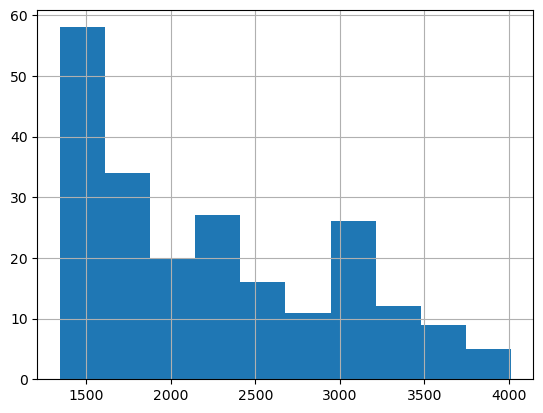

In [10]:
df_repo[(df_repo['repo.stars'] < df_repo['repo.stars'].quantile(.8)) & (df_repo['repo.stars'] > df_repo['repo.stars'].quantile(.2))]['repo.stars'].hist();
print('Distribution of analyzed repositories over stars, from 0.2 to 0.8 percentiles.')

Distribution of analyzed repositories over size in bytes, from 0.2 to 0.8 percentiles.


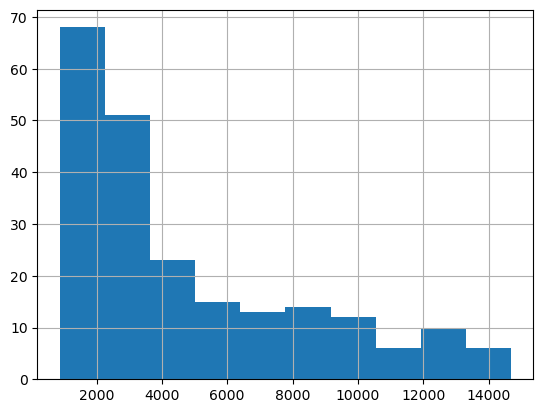

In [11]:
df_repo[(df_repo['repo.size'] < df_repo['repo.size'].quantile(.8)) & (df_repo['repo.size'] > df_repo['repo.size'].quantile(.2))]['repo.size'].hist();
print('Distribution of analyzed repositories over size in bytes, from 0.2 to 0.8 percentiles.')

## Description of features in the dataset
Features in the dataset - detailed description can be obtained in the Overleaf report.

List of columns:

In [12]:
print(f'Number of Columns in the dataset: {df.columns.shape[0]}')
list(df.columns)

Number of Columns in the dataset: 311


['url',
 'complexity.all_fn',
 'complexity.closure',
 'complexity.impl_item_fn',
 'complexity.item_fn',
 'complexity.trait_default_fn',
 'enums.attr_count',
 'enums.variant_attr_count',
 'enums.variant_count',
 'fn_arg_count.mutable',
 'fn_depth',
 'if_count',
 'lcom4_per_impl_block',
 'macro.argument_size',
 'macro.count_per_file',
 'per_file.enum_count',
 'per_file.impl_block_count',
 'per_file.pub_fn_count',
 'per_file.struct_count',
 'rca.function.cognitive.average',
 'rca.function.cognitive.max',
 'rca.function.cognitive.min',
 'rca.function.cognitive.sum',
 'rca.function.cyclomatic.average',
 'rca.function.cyclomatic.max',
 'rca.function.cyclomatic.min',
 'rca.function.cyclomatic.sum',
 'rca.function.halstead.N1',
 'rca.function.halstead.N2',
 'rca.function.halstead.bugs',
 'rca.function.halstead.difficulty',
 'rca.function.halstead.effort',
 'rca.function.halstead.estimated_program_length',
 'rca.function.halstead.length',
 'rca.function.halstead.level',
 'rca.function.halstead.

As can be seen from above, metrics collected are about classes and methods in the repositories, as well as repo-wide metrics like # of starts, forks, etc.

## Basic Descriptive statistics about repositories features

In [13]:
df_functions.describe()

,rca.function.cognitive.average,rca.function.cognitive.max,rca.function.cognitive.min,rca.function.cognitive.sum,rca.function.cyclomatic.average,rca.function.cyclomatic.max,rca.function.cyclomatic.min,rca.function.cyclomatic.sum,rca.function.loc.blank,rca.function.loc.blank_average,...,rca.function.halstead.n1,rca.function.halstead.n2,rca.function.halstead.purity_ratio,rca.function.halstead.time,rca.function.halstead.vocabulary,rca.function.halstead.volume,rca.function.mi.mi_original,rca.function.mi.mi_sei,rca.function.mi.mi_visual_studio,url
count,1.461418e+06,1.461418e+06,1.461418e+06,1.461418e+06,1.461418e+06,1.461418e+06,1.461418e+06,1.461418e+06,1.461418e+06,1.461418e+06,...,1.461418e+06,1.461418e+06,1.460818e+06,1.460818e+06,1.461418e+06,1.461418e+06,1.461413e+06,1.461413e+06,1.461413e+06,1.461419e+06
mean,6.710714e-01,9.075952e-01,5.431855e-01,9.738152e-01,1.977510e+00,2.218651e+00,1.847772e+00,2.512109e+00,7.475165e-01,6.396808e-01,...,1.010317e+01,1.032883e+01,1.634751e+00,5.276949e+02,2.043200e+01,2.943638e+02,1.174488e+02,9.641895e+01,6.869310e+01,1.060881e+02
std,5.178962e+00,6.305111e+00,5.070277e+00,6.613764e+00,8.725919e+00,9.583456e+00,8.670273e+00,1.036692e+01,6.278252e+01,8.035544e+00,...,4.839174e+00,2.147760e+01,4.664330e-01,9.296982e+04,2.361261e+01,3.351527e+03,2.424329e+01,3.289355e+01,1.407745e+01,1.060993e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-7.515900e+04,-1.578971e+02,...,1.000000e+00,0.000000e+00,0.000000e+00,8.333333e-02,1.000000e+00,0.000000e+00,-1.243538e+03,-1.339673e+03,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,6.000000e+00,3.000000e+00,1.333333e+00,1.081072e+01,1.000000e+01,4.497261e+01,1.033987e+02,7.673431e+01,6.046705e+01,2.500000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,7.000000e+00,1.676618e+00,5.278596e+01,1.700000e+01,1.209278e+02,1.202598e+02,9.908680e+01,7.032738e+01,5.500000e+01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,1.400000e+01,1.300000e+01,1.957895e+00,1.890027e+02,2.600000e+01,2.788266e+02,1.329957e+02,1.171410e+02,7.777524e+01,1.840000e+02
max,5.206000e+03,5.206000e+03,5.206000e+03,5.206000e+03,5.206000e+03,5.206000e+03,5.206000e+03,5.206000e+03,8.072000e+03,8.072000e+03,...,4.500000e+01,1.041300e+04,1.220073e+01,1.029163e+08,1.042100e+04,3.782111e+06,1.650572e+02,2.069032e+02,9.652469e+01,3.630000e+02


In [14]:
df_structs.describe()

,rca.impl.cyclomatic.average,rca.impl.cyclomatic.max,rca.impl.cyclomatic.min,rca.impl.cyclomatic.sum,rca.impl.halstead.N1,rca.impl.halstead.N2,rca.impl.halstead.bugs,rca.impl.halstead.difficulty,rca.impl.halstead.effort,rca.impl.halstead.estimated_program_length,...,rca.impl.nom.closures,rca.impl.nom.closures_average,rca.impl.nom.closures_max,rca.impl.nom.closures_min,rca.impl.nom.functions,rca.impl.nom.functions_average,rca.impl.nom.functions_max,rca.impl.nom.functions_min,rca.impl.nom.total,url
count,557025.000000,557025.000000,557025.000000,557025.000000,557025.000000,557025.000000,535432.000000,535432.000000,5.354320e+05,535432.000000,...,557025.000000,557025.000000,557025.000000,557025.0,557025.000000,557025.000000,557025.000000,557025.0,557025.000000,557027.000000
mean,2.000602,2.973270,1.393291,5.597745,52.867279,31.505388,0.133380,10.792648,2.761077e+04,83.076211,...,0.216358,0.022330,0.068376,0.0,1.574796,0.376167,0.685515,0.0,1.791155,85.003508
std,3.663737,7.963115,0.494704,21.998935,250.215072,152.773307,0.607268,12.943731,4.474664e+05,279.220377,...,2.200531,0.091901,0.252390,0.0,5.659905,0.276569,0.464311,0.0,6.616826,93.183674
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000333,0.500000,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.500000,2.000000,1.000000,2.000000,5.000000,2.000000,0.008059,4.000000,1.188722e+02,19.609640,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,25.000000
50%,1.571429,2.000000,1.000000,3.000000,13.000000,7.000000,0.021893,6.600000,5.322857e+02,39.509775,...,0.000000,0.000000,0.000000,0.0,1.000000,0.500000,1.000000,0.0,1.000000,25.000000
75%,2.000000,2.000000,2.000000,4.000000,35.000000,19.000000,0.073149,13.000000,3.250799e+03,86.522250,...,0.000000,0.000000,0.000000,0.0,1.000000,0.500000,1.000000,0.0,1.000000,135.000000
max,652.000000,978.000000,7.000000,10091.000000,90146.000000,53018.000000,115.404140,436.071429,2.037108e+08,100680.762823,...,903.000000,0.983607,1.000000,0.0,2560.000000,0.999610,1.000000,0.0,2560.000000,363.000000


We have 364 repositories for analysis in total, for 130 useful metrics (corresponging to functions or structures).

Metrics have different scale as their nature varies, ranging from min-max from 0 to 1042 up to $10^4$ to $10^8$.

The report above also contains quartiles for the data, which can help in further analysis, for example, for outliers filtering.

## Null values in the dataset

In [15]:
NA_columnwise_functions = df_functions.isna().sum(axis=0)
NA_columnwise_functions

rca.function.cognitive.average      1
rca.function.cognitive.max          1
rca.function.cognitive.min          1
rca.function.cognitive.sum          1
rca.function.cyclomatic.average     1
                                   ..
rca.function.halstead.volume        1
rca.function.mi.mi_original         6
rca.function.mi.mi_sei              6
rca.function.mi.mi_visual_studio    6
url                                 0
Length: 70, dtype: int64

In [16]:
NA_columnwise_structs = df_structs.isna().sum(axis=0)
NA_columnwise_structs

rca.impl.cyclomatic.average       2
rca.impl.cyclomatic.max           2
rca.impl.cyclomatic.min           2
rca.impl.cyclomatic.sum           2
rca.impl.halstead.N1              2
                                 ..
rca.impl.nom.functions_average    2
rca.impl.nom.functions_max        2
rca.impl.nom.functions_min        2
rca.impl.nom.total                2
url                               0
Length: 62, dtype: int64

In [17]:
NA_columnwise_functions.describe(percentiles=[.25, .5, .75, .9, .95, .99])

count     70.000000
mean      61.200000
std      181.235422
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
90%       65.500000
95%      601.000000
99%      601.000000
max      601.000000
dtype: float64

In [18]:
NA_columnwise_structs.describe(percentiles=[.25, .5, .75, .9, .95, .99])

count       62.000000
mean      2472.887097
std       6879.133774
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
90%      19503.900000
95%      21595.000000
99%      21595.000000
max      21595.000000
dtype: float64

We can see that there are not so many columns containing NaNs which indicate high quality of the dataset collected.

In [19]:
na_count_functions =  df_functions.isna().sum().sum()
total_count_functions = df_functions.shape[0] * df_functions.shape[1]

print('Total NA count:', na_count_functions)
print('Total ratio of NA/null to the whole dataset', (na_count_functions/total_count_functions)*100, '%')

Total NA count: 4284
Total ratio of NA/null to the whole dataset 0.004187710711301824 %


In [20]:
na_count_structs =  df_structs.isna().sum().sum()
total_count_structs = df_structs.shape[0] * df_structs.shape[1]

print('Total NA count:', na_count_structs)
print('Total ratio of NA/null to the whole dataset', (na_count_structs/total_count_structs)*100, '%')

Total NA count: 153319
Total ratio of NA/null to the whole dataset 0.44394384774421947 %


For the functions the total number of NaN entries is negligible. For structures this might seem rather high but it still remains below 0.5% so we can ignore it as well.

In [21]:
print('Detailed report for each repository with a non-zero number of NaNs in function metrics')
repo_counts = 0
for repo in urls_encoder.keys():
    repo_id = urls_encoder[repo]
    repo_records = df_functions[df_functions['url'] == repo_id]
    n_records = repo_records.shape[0]
    nan_records = ((repo_records.isna().sum(axis=1) > 0).sum())
    if nan_records > 0:
        print(f'{repo}({repo_id}) contains {nan_records} (out of {n_records} or {100 * nan_records / n_records: .2f}%) records with NaNs')
        repo_counts += 1

print(f'In total, {repo_counts} contain NaNs')

Detailed report for each repository with a non-zero number of NaNs in function metrics
git@github.com:rust-lang/rust.git(0) contains 268 (out of 144307 or  0.19%) records with NaNs
git@github.com:influxdata/influxdb.git(3) contains 2 (out of 13941 or  0.01%) records with NaNs
git@github.com:surrealdb/surrealdb.git(4) contains 6 (out of 7275 or  0.08%) records with NaNs
git@github.com:tokio-rs/tokio.git(5) contains 24 (out of 7348 or  0.33%) records with NaNs
git@github.com:SergioBenitez/Rocket.git(6) contains 6 (out of 3733 or  0.16%) records with NaNs
git@github.com:pola-rs/polars.git(7) contains 4 (out of 18696 or  0.02%) records with NaNs
git@github.com:tikv/tikv.git(11) contains 23 (out of 25121 or  0.09%) records with NaNs
git@github.com:rust-lang/rust-analyzer.git(12) contains 6 (out of 20314 or  0.03%) records with NaNs
git@github.com:tokio-rs/axum.git(13) contains 60 (out of 2212 or  2.71%) records with NaNs
git@github.com:rust-lang/rust-clippy.git(19) contains 11 (out of 12856

As we can see, one repository has no valid functions at all. Detailed analysis of the repository reveals that there are no functions defined in code. For other repositories it's below 3% - not a big loss. Moreover, only 53 repos have NaNs in their metrics. This result suggests that NaNs tend to group in records.

In [22]:
print('Detailed report for each repository with a non-zero number of NaNs in struct metrics')
repo_counts = 0
for repo in urls_encoder.keys():
    repo_id = urls_encoder[repo]
    repo_records = df_structs[df_structs['url'] == repo_id]
    n_records = repo_records.shape[0]
    nan_records = ((repo_records.isna().sum(axis=1) > 0).sum())
    if nan_records > 0:
        print(f'{repo}({repo_id}) contains {nan_records} (out of {n_records} or {100 * nan_records / n_records: .2f}%) records with NaNs')
        repo_counts += 1

print(f'In total, {repo_counts} contain NaNs')

Detailed report for each repository with a non-zero number of NaNs in struct metrics
git@github.com:rust-lang/rust.git(0) contains 4124 (out of 28014 or  14.72%) records with NaNs
git@github.com:nushell/nushell.git(2) contains 12 (out of 1114 or  1.08%) records with NaNs
git@github.com:influxdata/influxdb.git(3) contains 10 (out of 2771 or  0.36%) records with NaNs
git@github.com:surrealdb/surrealdb.git(4) contains 16 (out of 1693 or  0.95%) records with NaNs
git@github.com:tokio-rs/tokio.git(5) contains 171 (out of 1747 or  9.79%) records with NaNs
git@github.com:SergioBenitez/Rocket.git(6) contains 18 (out of 942 or  1.91%) records with NaNs
git@github.com:pola-rs/polars.git(7) contains 224 (out of 3110 or  7.20%) records with NaNs
git@github.com:actix/actix-web.git(8) contains 14 (out of 949 or  1.48%) records with NaNs
git@github.com:valeriansaliou/sonic.git(9) contains 2 (out of 78 or  2.56%) records with NaNs
git@github.com:astral-sh/ruff.git(10) contains 20 (out of 3123 or  0.64

For structures the situation is the way more disappointing: 288 repositories out of 364 contain at least 1 record with NaNs. The percentage of NaNs tends to be below 10% but might reach 45% and even 100% in one repository (the same one as on functions). 

## Correlation analysis

### Saving most and least correlated metrics groups

In [ ]:
def get_correlated_subset(corr, threshold=0.6, high=True, n=10):
    columns = corr.columns
    
    correlated_num = {col: 0 for col in columns}
    
    for i, (metric_name, column) in enumerate(corr.items()):
        for j, (other_metric_name, corr_value) in enumerate(column.items()):
            if i < j:
                if (high and abs(corr_value) > threshold) or (not high and abs(corr_value) < threshold):
                    correlated_num[metric_name] += 1

    corr_list = [(k, v) for k, v in correlated_num.items()]
    corr_list.sort(key=lambda x:-x[1])
#     print(corr_list)
    return [x[0] for x in corr_list[:n]]

def save_correlation_matrices(corr_matrix, kind='function'):
    assert kind == 'function' or kind == 'struct'

    high_corr = get_correlated_subset(corr_matrix, threshold=0.7, high=True, n=10)
    corr_matrix[high_corr].corr().to_csv(os.path.join('data', f'{kind}-high-corr.csv'))

    low_corr = get_correlated_subset(corr_matrix, threshold=0.2, high=False, n=10)
    corr_matrix[low_corr].corr().to_csv(os.path.join('data', f'{kind}-low-corr.csv'))

    

save_correlation_matrices(df_structs, kind='struct')
save_correlation_matrices(df_functions, kind='function')

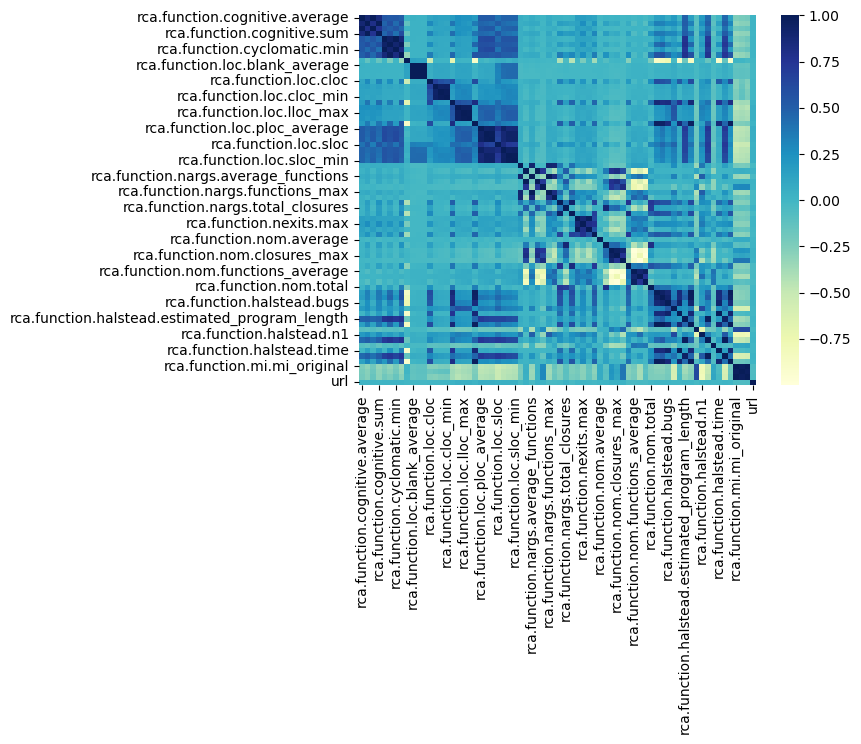

In [23]:
dataplot = sns.heatmap(df_functions.corr(), cmap="YlGnBu", annot=False)
plt.show()

From visual inspection of correlation matrix, which is indeed large as we have 70 features, we can observe the following:

- There are groups of features that are nearly with correlation 1.0, these features are typically of the same type but 'mode' and 'avg'. This is useful observation and yields that we should drop one of these features for minimal subset construction.

- Some features have negative correlation of -0.75 and less, typically these features are opposite in meaning: min and max. This is also logical behaviour and useful for analysis.

- Most of features, marked with 'sea green' colour on the plot, have very low correlation around 0. This suggests that these features may not be dependent and will be present in the final feature set together.

Let's also explicitly list pairs of metrics that have empirically strong positive or negative correlations

In [24]:
correlations = df_functions.corr()
correlations

,rca.function.cognitive.average,rca.function.cognitive.max,rca.function.cognitive.min,rca.function.cognitive.sum,rca.function.cyclomatic.average,rca.function.cyclomatic.max,rca.function.cyclomatic.min,rca.function.cyclomatic.sum,rca.function.loc.blank,rca.function.loc.blank_average,...,rca.function.halstead.n1,rca.function.halstead.n2,rca.function.halstead.purity_ratio,rca.function.halstead.time,rca.function.halstead.vocabulary,rca.function.halstead.volume,rca.function.mi.mi_original,rca.function.mi.mi_sei,rca.function.mi.mi_visual_studio,url
rca.function.cognitive.average,1.000000,0.884336,0.977488,0.850915,0.546611,0.526249,0.532363,0.492398,0.005178,0.031990,...,0.192769,0.451075,-0.082520,0.006835,0.449796,0.134520,-0.244314,-0.220942,-0.208012,0.010252
rca.function.cognitive.max,0.884336,1.000000,0.799893,0.985068,0.472980,0.581057,0.434103,0.583811,-0.130719,0.030420,...,0.253719,0.494979,-0.116317,0.141736,0.502221,0.296101,-0.310624,-0.281061,-0.272673,0.008887
rca.function.cognitive.min,0.977488,0.799893,1.000000,0.762882,0.541128,0.490557,0.545666,0.451120,0.003461,0.027948,...,0.141203,0.416450,-0.057530,0.004278,0.407734,0.117099,-0.191625,-0.172591,-0.155340,0.010275
rca.function.cognitive.sum,0.850915,0.985068,0.762882,1.000000,0.453412,0.573599,0.413329,0.603113,-0.150257,0.029254,...,0.265021,0.502653,-0.128282,0.165477,0.511517,0.329864,-0.327679,-0.297600,-0.289635,0.005604
rca.function.cyclomatic.average,0.546611,0.472980,0.541128,0.453412,1.000000,0.931268,0.992441,0.863136,0.002998,0.023513,...,0.135535,0.715212,-0.048979,0.008194,0.678321,0.190052,-0.257619,-0.233065,-0.186241,0.012918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rca.function.halstead.volume,0.134520,0.296101,0.117099,0.329864,0.190052,0.437051,0.178304,0.545491,-0.920534,0.005368,...,0.104005,0.426933,-0.060028,0.895441,0.409645,1.000000,-0.185566,-0.170281,-0.141311,0.002549
rca.function.mi.mi_original,-0.244314,-0.310624,-0.191625,-0.327679,-0.257619,-0.313396,-0.224617,-0.350090,0.010946,-0.133079,...,-0.794122,-0.513233,0.113698,-0.047308,-0.629574,-0.185566,1.000000,0.972933,0.996253,-0.052979
rca.function.mi.mi_sei,-0.220942,-0.281061,-0.172591,-0.297600,-0.233065,-0.283710,-0.202323,-0.319211,0.004648,-0.126846,...,-0.779609,-0.486863,0.093910,-0.039792,-0.602614,-0.170281,0.972933,1.000000,0.970841,-0.062036
rca.function.mi.mi_visual_studio,-0.208012,-0.272673,-0.155340,-0.289635,-0.186241,-0.237319,-0.153682,-0.274600,-0.019507,-0.133825,...,-0.798677,-0.456154,0.115026,-0.017508,-0.578590,-0.141311,0.996253,0.970841,1.000000,-0.053291


In [25]:
correlations_list = []

for i, (metric_name, column) in enumerate(correlations.items()):
  for j, (other_metric_name, corr_value) in enumerate(column.items()):
    if abs(corr_value) > 0.5 and i < j: # only significant and different values with fixed order
      correlations_list.append((metric_name, other_metric_name, corr_value))

print(len(correlations_list))
print(correlations_list[:10])

300
[('rca.function.cognitive.average', 'rca.function.cognitive.max', 0.8843359727987039), ('rca.function.cognitive.average', 'rca.function.cognitive.min', 0.9774881395617473), ('rca.function.cognitive.average', 'rca.function.cognitive.sum', 0.8509151310935615), ('rca.function.cognitive.average', 'rca.function.cyclomatic.average', 0.5466108316208067), ('rca.function.cognitive.average', 'rca.function.cyclomatic.max', 0.5262486568934848), ('rca.function.cognitive.average', 'rca.function.cyclomatic.min', 0.5323627298683439), ('rca.function.cognitive.average', 'rca.function.loc.ploc_average', 0.5194801048906286), ('rca.function.cognitive.average', 'rca.function.loc.ploc_max', 0.5186732518571913), ('rca.function.cognitive.average', 'rca.function.loc.ploc_min', 0.5181988664139244), ('rca.function.cognitive.max', 'rca.function.cognitive.min', 0.799892969810862)]


In [26]:
dfcorr = pd.DataFrame(correlations_list)
dfcorr.to_csv('analysis/high-correlation-pairs-functions.csv')
dfcorr

,0,1,2
0,rca.function.cognitive.average,rca.function.cognitive.max,0.884336
1,rca.function.cognitive.average,rca.function.cognitive.min,0.977488
2,rca.function.cognitive.average,rca.function.cognitive.sum,0.850915
3,rca.function.cognitive.average,rca.function.cyclomatic.average,0.546611
4,rca.function.cognitive.average,rca.function.cyclomatic.max,0.526249
...,...,...,...
295,rca.function.halstead.vocabulary,rca.function.mi.mi_sei,-0.602614
296,rca.function.halstead.vocabulary,rca.function.mi.mi_visual_studio,-0.578590
297,rca.function.mi.mi_original,rca.function.mi.mi_sei,0.972933
298,rca.function.mi.mi_original,rca.function.mi.mi_visual_studio,0.996253


In [27]:
dfcorr.describe()

,2
count,300.000000
mean,0.516078
std,0.539066
min,-0.999995
25%,0.526942
50%,0.629073
75%,0.861732
max,1.000000


We see that there are 300 pairs of empirically high correlated metrics.

Among them, maximum correlations is 1.0 (without repeated metrics) and minimum is -1.

Exclude sum metrics

In [28]:
dfcorr1 = pd.DataFrame(correlations_list)
dfcorr1.dtypes

0     object
1     object
2    float64
dtype: object

In [29]:
dfcorr1 = pd.DataFrame(correlations_list)
dfcorr1[0] = dfcorr1[0].astype(str)
dfcorr1[1] = dfcorr1[1].astype(str)
dfcorr_nosum = dfcorr1[~(dfcorr1[0].str.endswith('sum') | dfcorr1[1].str.endswith('sum'))]
dfcorr_nosum.to_csv('analysis/high-correlation-pairs-funstions-nosum.csv')
# dfcorr.to_csv('high-correlation-pairs.csv')
dfcorr_nosum

,0,1,2
0,rca.function.cognitive.average,rca.function.cognitive.max,0.884336
1,rca.function.cognitive.average,rca.function.cognitive.min,0.977488
3,rca.function.cognitive.average,rca.function.cyclomatic.average,0.546611
4,rca.function.cognitive.average,rca.function.cyclomatic.max,0.526249
5,rca.function.cognitive.average,rca.function.cyclomatic.min,0.532363
...,...,...,...
295,rca.function.halstead.vocabulary,rca.function.mi.mi_sei,-0.602614
296,rca.function.halstead.vocabulary,rca.function.mi.mi_visual_studio,-0.578590
297,rca.function.mi.mi_original,rca.function.mi.mi_sei,0.972933
298,rca.function.mi.mi_original,rca.function.mi.mi_visual_studio,0.996253


If we do not consider 'sum' metric, there are only 267 pairs of empricially high correlated features.

From individual inspection of highly empirically correlated pairs, we draw the following conclusions:

- Metrics of the same family (for example *rca.function.cognitive*) tend to have quite high correlations with each other (>50%)
- *rca.functions.cognitive* has quite high correlation with metrics measuring or estimating the length of the source code
- *rca.cognitive.average* and *rca.cyclomatic.average* have correlation of ~$0.54$. This means the larger cyclomatic complexity of the code (presence of loops and conditionals), the harder it is to percieve the code on average. This is intuitive yet useful observation.
- *rca.halstead.N2* and *rca.halstead.bugs* have correlation of ~$0.914$. N2 is number of operands in the program. It seems that the larget number of operands, the more code is prone to contain errors. Also,rca.halstead.N1* and *rca.halstead.bugs* have similar correlation of ~$0.88$, indicating N1 - number of operations - also produce create more buggy code.
- *rca.halstead.N1* and *rca.loc.ploc* have nearly perfect positive correlation of ~$0.959$. It means that N1 - number of operations - correlates with ploc - number of physical lines of code. This is very logical.
- *rca.halstead.difficulty* and *rca.mi.mi_visual_studio* (and all *rca.mi* metrics group) have correlation of ~$-0.63$. It is remarkable that different testsuites and methods present in the analysis produce results that align with each other. The more the difficulty - the less the MI - maintainability index.
- *rca.mi.mi_original* and *rca.nargs.total* have correlation of ~$-0.795$. MI - maintainability index decreases and total number of arguments (per file, averaged) grows.

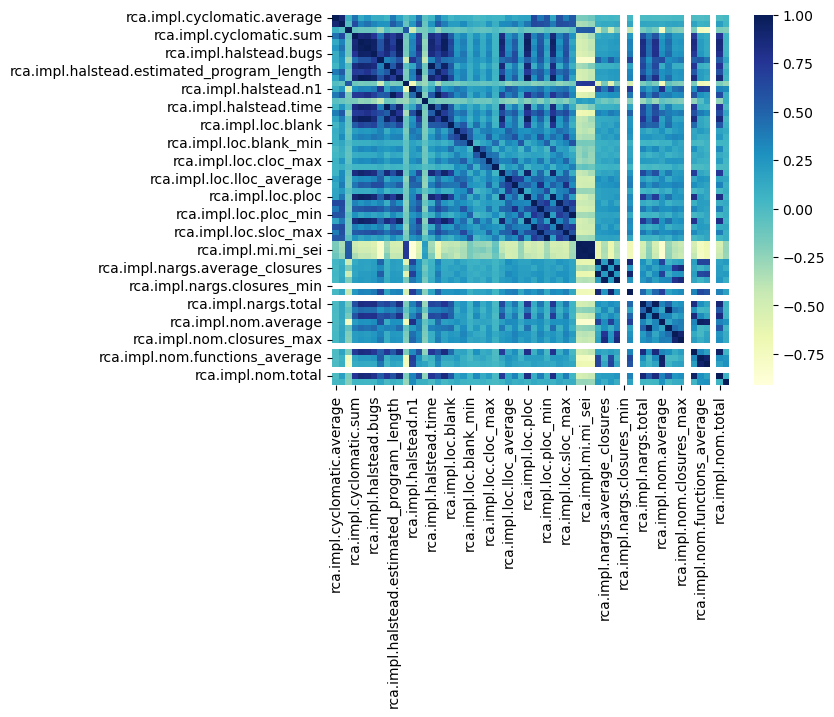

In [30]:
dataplot = sns.heatmap(df_structs.corr(), cmap="YlGnBu", annot=False)
plt.show()

In [31]:
correlations = df_structs.corr()
correlations

,rca.impl.cyclomatic.average,rca.impl.cyclomatic.max,rca.impl.cyclomatic.min,rca.impl.cyclomatic.sum,rca.impl.halstead.N1,rca.impl.halstead.N2,rca.impl.halstead.bugs,rca.impl.halstead.difficulty,rca.impl.halstead.effort,rca.impl.halstead.estimated_program_length,...,rca.impl.nom.closures,rca.impl.nom.closures_average,rca.impl.nom.closures_max,rca.impl.nom.closures_min,rca.impl.nom.functions,rca.impl.nom.functions_average,rca.impl.nom.functions_max,rca.impl.nom.functions_min,rca.impl.nom.total,url
rca.impl.cyclomatic.average,1.000000,0.886303,0.088439,0.430606,0.128595,0.232373,0.110791,0.113425,0.049447,0.394547,...,0.012866,0.027989,0.024318,NaN,-0.004770,-0.007445,0.003756,NaN,0.000198,0.025264
rca.impl.cyclomatic.max,0.886303,1.000000,-0.016694,0.627516,0.350834,0.431951,0.333525,0.269291,0.254744,0.535930,...,0.156388,0.169638,0.153878,NaN,0.158600,0.075116,0.084457,NaN,0.187673,0.052434
rca.impl.cyclomatic.min,0.088439,-0.016694,1.000000,-0.077354,-0.115081,-0.108883,-0.115486,-0.276296,-0.035460,-0.129862,...,-0.076038,-0.186822,-0.208720,NaN,-0.183909,-0.765279,-0.803640,NaN,-0.182600,-0.203013
rca.impl.cyclomatic.sum,0.430606,0.627516,-0.077354,1.000000,0.867445,0.881600,0.760723,0.422459,0.829308,0.717446,...,0.390246,0.203577,0.214417,NaN,0.736246,0.155474,0.111371,NaN,0.759553,0.051147
rca.impl.halstead.N1,0.128595,0.350834,-0.115081,0.867445,1.000000,0.975719,0.941715,0.580769,0.906544,0.696112,...,0.456765,0.229935,0.250895,NaN,0.836992,0.214306,0.131689,NaN,0.867852,0.047956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rca.impl.nom.functions_average,-0.007445,0.075116,-0.765279,0.155474,0.214306,0.212078,0.235627,0.546930,0.079133,0.215761,...,0.027951,0.024962,0.104480,NaN,0.323106,1.000000,0.921232,NaN,0.285674,0.255397
rca.impl.nom.functions_max,0.003756,0.084457,-0.803640,0.111371,0.131689,0.127609,0.134166,0.404238,0.038999,0.162129,...,0.066561,0.164384,0.183372,NaN,0.188455,0.921232,1.000000,NaN,0.183337,0.270762
rca.impl.nom.functions_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rca.impl.nom.total,0.000198,0.187673,-0.182600,0.759553,0.867852,0.843642,0.787990,0.536512,0.760108,0.585540,...,0.569698,0.252922,0.289572,NaN,0.947576,0.285674,0.183337,NaN,1.000000,0.063103


In [32]:
correlations_list = []

for i, (metric_name, column) in enumerate(correlations.items()):
  for j, (other_metric_name, corr_value) in enumerate(column.items()):
    if abs(corr_value) > 0.5 and i < j: # only significant and different values with fixed order
      correlations_list.append((metric_name, other_metric_name, corr_value))

print(len(correlations_list))
print(correlations_list[:10])

381
[('rca.impl.cyclomatic.average', 'rca.impl.cyclomatic.max', 0.8863033571443986), ('rca.impl.cyclomatic.average', 'rca.impl.loc.ploc_average', 0.6352741038910885), ('rca.impl.cyclomatic.average', 'rca.impl.loc.ploc_min', 0.574089868309213), ('rca.impl.cyclomatic.average', 'rca.impl.loc.sloc_average', 0.6015719543017962), ('rca.impl.cyclomatic.average', 'rca.impl.loc.sloc_min', 0.5490697675207092), ('rca.impl.cyclomatic.max', 'rca.impl.cyclomatic.sum', 0.6275162277049521), ('rca.impl.cyclomatic.max', 'rca.impl.halstead.estimated_program_length', 0.5359296542378873), ('rca.impl.cyclomatic.max', 'rca.impl.halstead.n2', 0.5645905002393861), ('rca.impl.cyclomatic.max', 'rca.impl.halstead.vocabulary', 0.5510245310435771), ('rca.impl.cyclomatic.max', 'rca.impl.loc.ploc_average', 0.6395904787366512)]


In [33]:
dfcorr = pd.DataFrame(correlations_list)
dfcorr.to_csv('analysis/high-correlation-pairs-structs.csv')
dfcorr

,0,1,2
0,rca.impl.cyclomatic.average,rca.impl.cyclomatic.max,0.886303
1,rca.impl.cyclomatic.average,rca.impl.loc.ploc_average,0.635274
2,rca.impl.cyclomatic.average,rca.impl.loc.ploc_min,0.574090
3,rca.impl.cyclomatic.average,rca.impl.loc.sloc_average,0.601572
4,rca.impl.cyclomatic.average,rca.impl.loc.sloc_min,0.549070
...,...,...,...
376,rca.impl.nom.average,rca.impl.nom.functions_max,0.919226
377,rca.impl.nom.closures,rca.impl.nom.total,0.569698
378,rca.impl.nom.closures_average,rca.impl.nom.closures_max,0.896869
379,rca.impl.nom.functions,rca.impl.nom.total,0.947576


In [34]:
dfcorr.describe()

,2
count,381.000000
mean,0.494588
std,0.520432
min,-0.908131
25%,0.537068
50%,0.637534
75%,0.812696
max,1.000000


Here we have 381 highly correlated features for 61 metrics.

In [35]:
dfcorr1 = pd.DataFrame(correlations_list)
dfcorr1.dtypes

0     object
1     object
2    float64
dtype: object

In [36]:
dfcorr1 = pd.DataFrame(correlations_list)
dfcorr1[0] = dfcorr1[0].astype(str)
dfcorr1[1] = dfcorr1[1].astype(str)
dfcorr_nosum = dfcorr1[~(dfcorr1[0].str.endswith('sum') | dfcorr1[1].str.endswith('sum'))]
dfcorr_nosum.to_csv('analysis/high-correlation-pairs-structs-nosum.csv')
# dfcorr.to_csv('high-correlation-pairs.csv')
dfcorr_nosum

,0,1,2
0,rca.impl.cyclomatic.average,rca.impl.cyclomatic.max,0.886303
1,rca.impl.cyclomatic.average,rca.impl.loc.ploc_average,0.635274
2,rca.impl.cyclomatic.average,rca.impl.loc.ploc_min,0.574090
3,rca.impl.cyclomatic.average,rca.impl.loc.sloc_average,0.601572
4,rca.impl.cyclomatic.average,rca.impl.loc.sloc_min,0.549070
...,...,...,...
376,rca.impl.nom.average,rca.impl.nom.functions_max,0.919226
377,rca.impl.nom.closures,rca.impl.nom.total,0.569698
378,rca.impl.nom.closures_average,rca.impl.nom.closures_max,0.896869
379,rca.impl.nom.functions,rca.impl.nom.total,0.947576


We could see that only 21 pairs are related to sum-aggregated metrics so, those are essentialy useless.

Individual analysis of highly correlated metrics reveals the following:
- High correlations inside the same families
- *rca.impl.cyclomatic* family of metrics is highly correlated with metrics that measure or estimate the source code size.
- High cyclomatic complexity has a strong correlation with Halstead's estimates of the number of bugs ($0.88$ and efforts ($0.82$) required.
- Halstead metrics highly correlate with metrics measuring the number of lines of code
- Halstead estimates of the number of bugs have a high negative correlation with MI. Quite expected - a chance to have high number of bugs in a maintainable code is significantly lower than in a spaghetti code.
- Halstead complexity has a high negative correlation ($-0.8$) with MI. Nothing unexpected

## Dataset preparation

based on previous analysis, let's drop rows with at least one NA/null

In [37]:
df_functions.dropna(inplace=True)
df_functions

,rca.function.cognitive.average,rca.function.cognitive.max,rca.function.cognitive.min,rca.function.cognitive.sum,rca.function.cyclomatic.average,rca.function.cyclomatic.max,rca.function.cyclomatic.min,rca.function.cyclomatic.sum,rca.function.loc.blank,rca.function.loc.blank_average,...,rca.function.halstead.n1,rca.function.halstead.n2,rca.function.halstead.purity_ratio,rca.function.halstead.time,rca.function.halstead.vocabulary,rca.function.halstead.volume,rca.function.mi.mi_original,rca.function.mi.mi_sei,rca.function.mi.mi_visual_studio,url
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,...,11.0,13.0,1.873032,89.230424,24.0,210.908275,105.180720,99.875103,61.509193,0
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,...,11.0,13.0,1.723189,102.377902,24.0,229.248125,100.956835,98.597616,59.039085,0
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,4.0,...,12.0,29.0,1.286021,440.304561,41.0,766.129937,77.738101,63.513672,45.460878,0
0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,...,10.0,7.0,1.823130,56.445915,17.0,118.536422,116.452351,92.609837,68.100790,0
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,7.0,4.0,1.975106,11.771677,11.0,48.432043,132.795640,115.984580,77.658269,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,...,9.0,6.0,1.631078,35.162015,15.0,105.486046,117.288887,93.714884,68.589993,363
363,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.0,3.0,1.056642,2.584963,6.0,23.264663,131.947966,114.761645,77.162553,363
363,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,9.0,5.0,2.006948,22.844130,14.0,76.147098,119.213628,96.389878,69.715572,363
363,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,6.0,4.0,1.567318,12.457230,10.0,49.828921,132.647784,115.771268,77.571803,363


In [38]:
df_structs.dropna(inplace=True)
df_structs

,rca.impl.cyclomatic.average,rca.impl.cyclomatic.max,rca.impl.cyclomatic.min,rca.impl.cyclomatic.sum,rca.impl.halstead.N1,rca.impl.halstead.N2,rca.impl.halstead.bugs,rca.impl.halstead.difficulty,rca.impl.halstead.effort,rca.impl.halstead.estimated_program_length,...,rca.impl.nom.closures,rca.impl.nom.closures_average,rca.impl.nom.closures_max,rca.impl.nom.closures_min,rca.impl.nom.functions,rca.impl.nom.functions_average,rca.impl.nom.functions_max,rca.impl.nom.functions_min,rca.impl.nom.total,url
0,2.000000,3.0,1.0,4.0,18.0,12.0,0.034459,8.571429,1051.061873,52.870765,...,0.0,0.000000,0.0,0.0,1.0,0.500000,1.0,0.0,1.0,0
0,1.454545,4.0,1.0,16.0,119.0,59.0,0.239458,20.060000,19254.239975,185.583273,...,0.0,0.000000,0.0,0.0,10.0,0.909091,1.0,0.0,10.0,0
0,1.333333,2.0,1.0,4.0,67.0,70.0,0.203652,21.666667,15101.285534,140.344382,...,1.0,0.333333,1.0,0.0,1.0,0.333333,1.0,0.0,2.0,0
0,4.200000,34.0,1.0,63.0,448.0,258.0,1.277551,49.370370,237273.633424,667.107936,...,10.0,0.666667,1.0,0.0,4.0,0.266667,1.0,0.0,14.0,0
0,1.500000,2.0,1.0,3.0,9.0,4.0,0.011458,4.666667,201.530304,24.406372,...,0.0,0.000000,0.0,0.0,1.0,0.500000,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1.500000,2.0,1.0,3.0,22.0,8.0,0.031933,8.000000,937.653743,44.828921,...,0.0,0.000000,0.0,0.0,1.0,0.500000,1.0,0.0,1.0,363
363,1.500000,2.0,1.0,3.0,19.0,9.0,0.038392,10.800000,1236.048763,54.629190,...,0.0,0.000000,0.0,0.0,1.0,0.500000,1.0,0.0,1.0,363
363,1.500000,2.0,1.0,3.0,19.0,10.0,0.044795,13.750000,1557.872625,46.053748,...,0.0,0.000000,0.0,0.0,1.0,0.500000,1.0,0.0,1.0,363
363,2.000000,2.0,2.0,2.0,9.0,2.0,0.010834,6.000000,185.285425,15.509775,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,363


## Dimensionality reduction

This part is related to the main task of the project and is still in progress

### PCA

Goal of PCA is to select components that contain the most variance. By choosing number of projected components, we can control how much variance from initial data we can recover

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_components = 11

X = df_functions.drop(columns=['url'])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to visualize the explained variance of each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio, 'Cumulative Variance Ratio': explained_variance_ratio.cumsum()})

# Display the explained variance
print(explained_variance)

    Explained Variance Ratio  Cumulative Variance Ratio
0                   0.257276                   0.257276
1                   0.143893                   0.401169
2                   0.122175                   0.523344
3                   0.069004                   0.592348
4                   0.063053                   0.655401
5                   0.044754                   0.700155
6                   0.038725                   0.738879
7                   0.038476                   0.777355
8                   0.036069                   0.813425
9                   0.027527                   0.840952
10                  0.026081                   0.867033


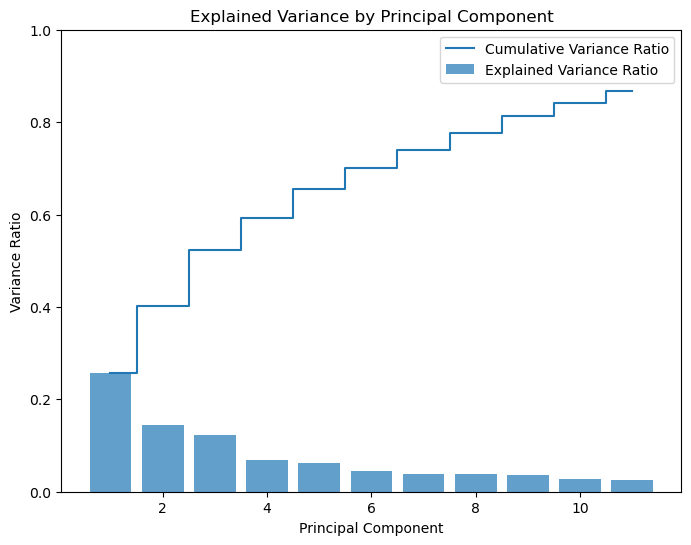

In [40]:
# Visualize the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio', alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance['Cumulative Variance Ratio'], where='mid', label='Cumulative Variance Ratio')
plt.xlabel('Principal Component')
plt.ylim((0, 1))
plt.ylabel('Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.show()

Visualization of dataset for low-dimensional space

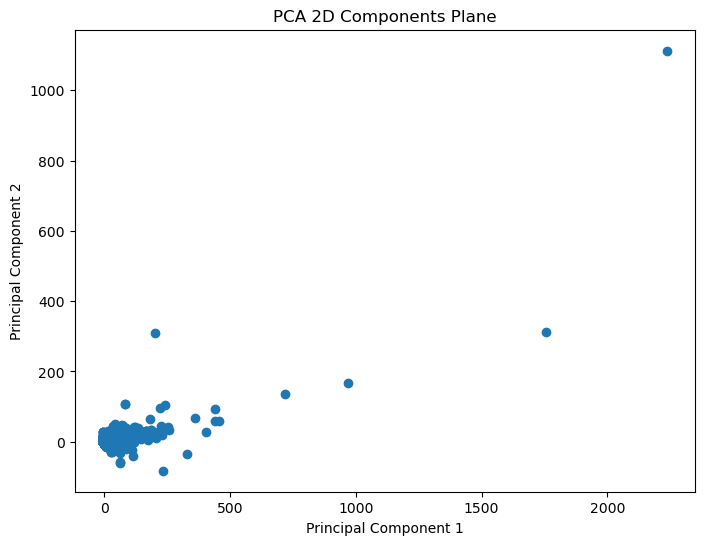

In [41]:
pca_components = 2

X = df_functions.drop(columns=['url'])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
pca.fit(X_scaled)

# Transform the data into the PCA space
X_pca = pca.transform(X_scaled)

# Visualize the data in the 2D PCA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Components Plane')
#for i, label in enumerate(df_functions['url']):
#    plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]))
plt.show()

Some outliers are detected


Let's drop components that are outliers and try again

In [42]:
outliers = set() # determined from above pca 2d plot
pc1_thresh = 300
pc2_thresh = 100

for i, url in enumerate(df_functions.url):
    if X_pca[i, 0] >= pc1_thresh or X_pca[i, 1] > pc2_thresh:
        outliers.add(url)
[urls_decoder[url] for url in outliers]

['git@github.com:rust-lang/rust.git',
 'git@github.com:google/mundane.git',
 'git@github.com:influxdata/influxdb.git',
 'git@github.com:Smithay/smithay.git',
 'git@github.com:ziesha-network/bazuka.git',
 'git@github.com:async-graphql/async-graphql.git',
 'git@github.com:astral-sh/ruff.git',
 'git@github.com:nical/lyon.git',
 'git@github.com:rust-lang/rust-clippy.git']

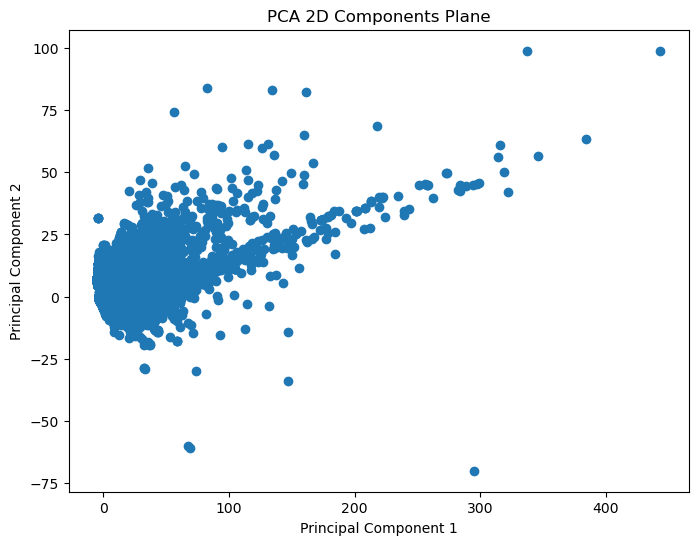

In [43]:
pca_components = 2

df1 = df_functions.copy()
df2 = df1[~df1['url'].isin(outliers)]
X = df2.drop(columns=['url'])


# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca_functions = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
pca_functions.fit(X_scaled)

# Transform the data into the PCA space
X_pca = pca_functions.transform(X_scaled)

# Visualize the data in the 2D PCA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Components Plane')
plt.show()

We now repeat the same process for struct metrics:

In [44]:
pca_components = 11

X = df_structs.drop(columns=['url'])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to visualize the explained variance of each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio, 'Cumulative Variance Ratio': explained_variance_ratio.cumsum()})

# Display the explained variance
print(explained_variance)

    Explained Variance Ratio  Cumulative Variance Ratio
0                   0.385396                   0.385396
1                   0.135231                   0.520627
2                   0.096938                   0.617565
3                   0.061820                   0.679385
4                   0.043753                   0.723137
5                   0.031170                   0.754307
6                   0.028981                   0.783288
7                   0.024188                   0.807476
8                   0.023142                   0.830618
9                   0.018976                   0.849594
10                  0.017858                   0.867452


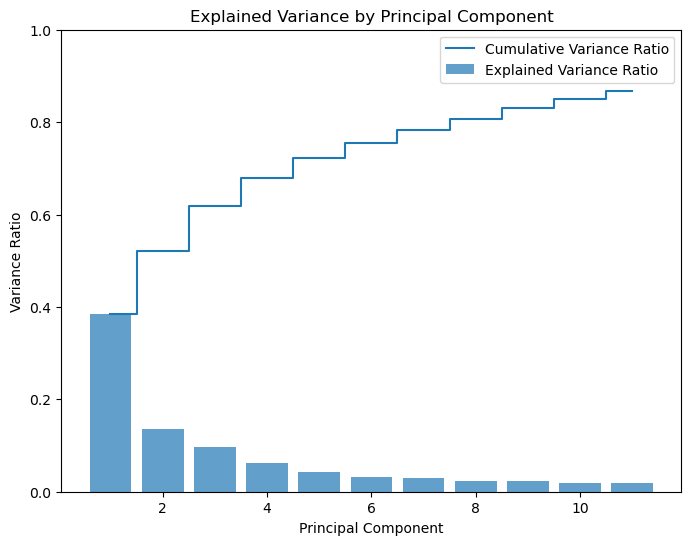

In [45]:
# Visualize the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio', alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance['Cumulative Variance Ratio'], where='mid', label='Cumulative Variance Ratio')
plt.xlabel('Principal Component')
plt.ylim((0, 1))
plt.ylabel('Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.show()

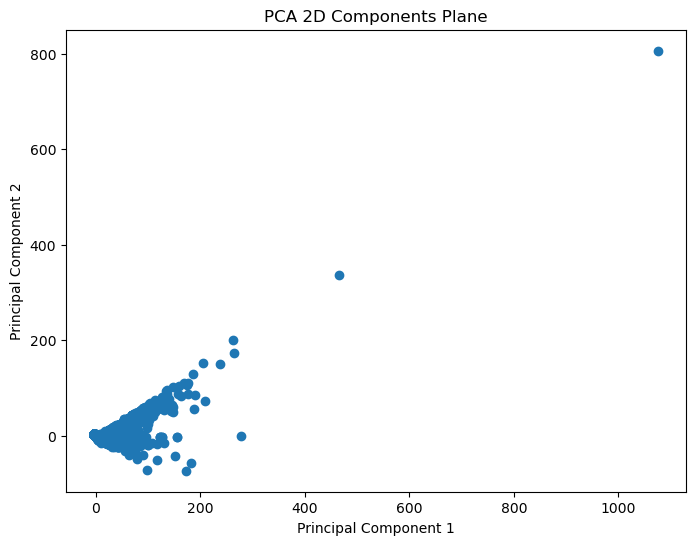

In [46]:
pca_components = 2

X = df_structs.drop(columns=['url'])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca_functions = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
pca_functions.fit(X_scaled)

# Transform the data into the PCA space
X_pca = pca_functions.transform(X_scaled)

# Visualize the data in the 2D PCA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Components Plane')
plt.show()

In [47]:
outliers = set() # determined from above pca 2d plot
pc1_thresh = 200
pc2_thresh = 150

for i, url in enumerate(df_structs.url):
    if X_pca[i, 0] >= pc1_thresh or X_pca[i, 1] > pc2_thresh:
        outliers.add(url)
[urls_decoder[url] for url in outliers]

['git@github.com:ron-rs/ron.git',
 'git@github.com:rusoto/rusoto.git',
 'git@github.com:gfx-rs/naga.git',
 'git@github.com:feather-rs/feather.git',
 'git@github.com:sqlparser-rs/sqlparser-rs.git',
 'git@github.com:viperproject/prusti-dev.git']

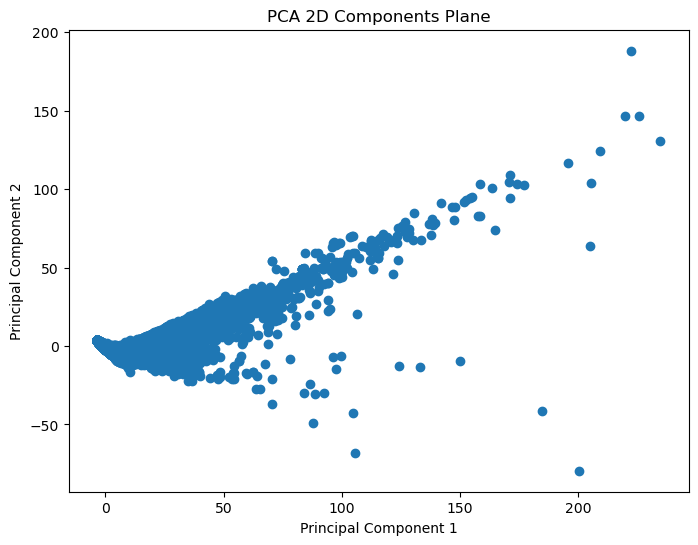

In [48]:
pca_components = 2

df1 = df_structs.copy()
df2 = df1[~df1['url'].isin(outliers)]
X = df2.drop(columns=['url'])


# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca_structs = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
pca_structs.fit(X_scaled)

# Transform the data into the PCA space
X_pca = pca_structs.transform(X_scaled)

# Visualize the data in the 2D PCA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Components Plane')
plt.show()

### PCA Features contribution

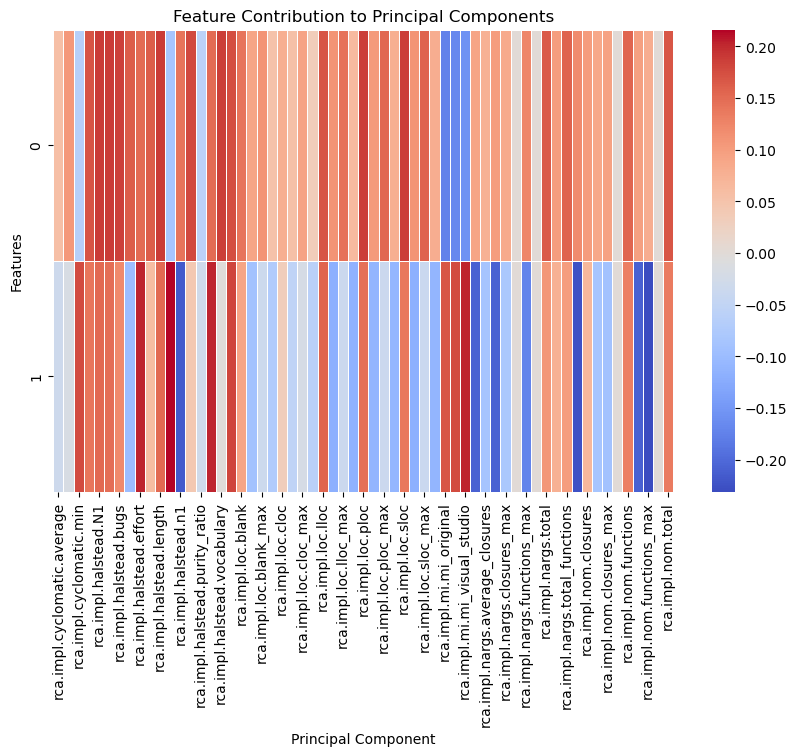

In [49]:
# Access the loadings (weights) of features for each principal component
loadings = pca_functions.components_

# Create a DataFrame to visualize feature contributions to each PC
loadings_df = pd.DataFrame(loadings, columns=X.columns)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Features')
plt.title('Feature Contribution to Principal Components')
plt.show()

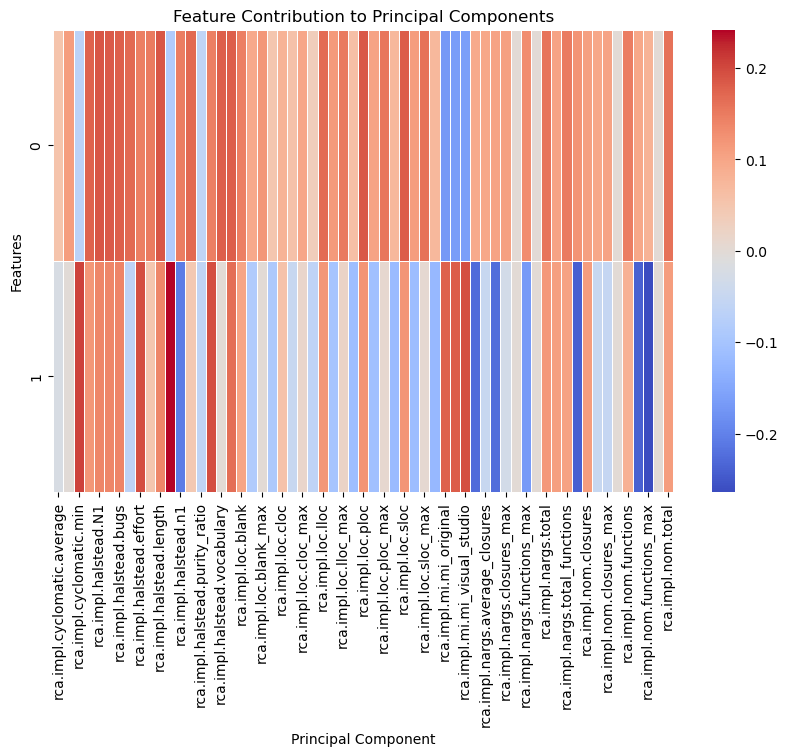

In [50]:
# Access the loadings (weights) of features for each principal component
loadings = pca_structs.components_

# Create a DataFrame to visualize feature contributions to each PC
loadings_df = pd.DataFrame(loadings, columns=X.columns)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Features')
plt.title('Feature Contribution to Principal Components')
plt.show()

### ICA

here ICA assumes features are independent, but this is not the case anyway.

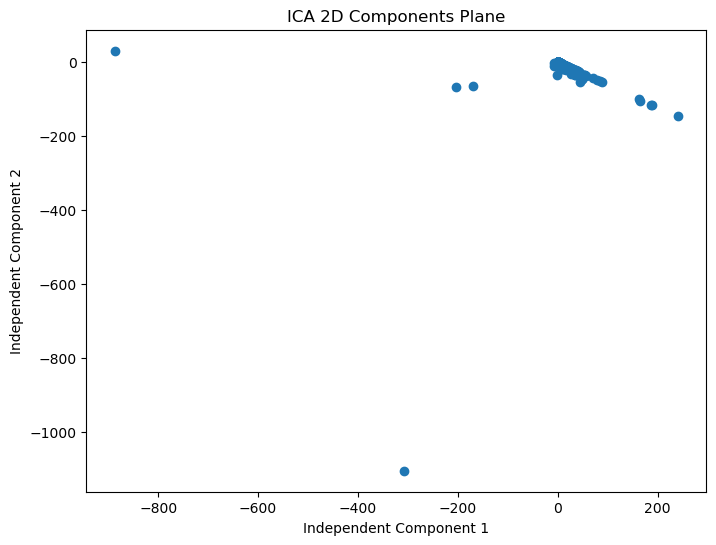

In [51]:
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

X = df_functions.drop(columns=['url'])

# Create an ICA instance with the desired number of components
ica = FastICA(n_components=2)  # You can specify the number of components you want

# Fit the ICA model to the data
X_ica = ica.fit_transform(X)

# Visualize the data in the 2D ICA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_ica[:, 0], X_ica[:, 1])
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('ICA 2D Components Plane')
plt.show()


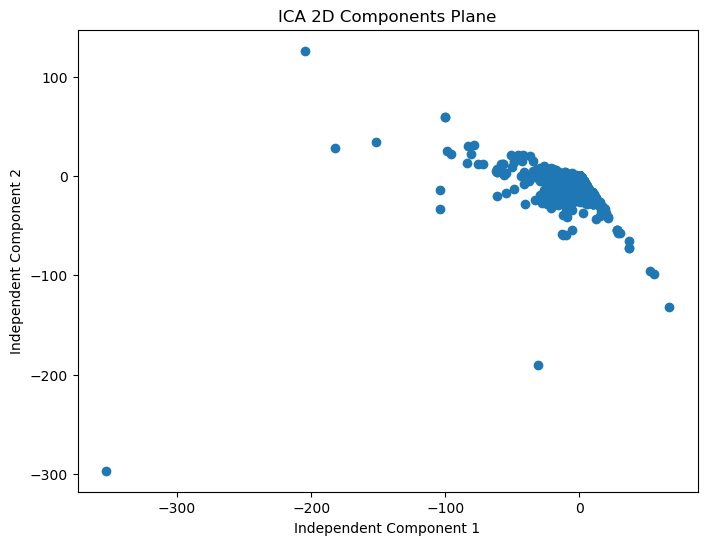

In [52]:
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

X = df_structs.drop(columns=['url'])

# Create an ICA instance with the desired number of components
ica = FastICA(n_components=2)  # You can specify the number of components you want

# Fit the ICA model to the data
X_ica = ica.fit_transform(X)

# Visualize the data in the 2D ICA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_ica[:, 0], X_ica[:, 1])
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('ICA 2D Components Plane')
plt.show()


Similar result to PCA, but in different projection.

### t-SNE
t-Distributed Stochastic Neighbor Embedding

In [53]:
from sklearn.manifold import TSNE

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, n_jobs=-1, verbose=2)

X = df_functions.drop(columns=['url'])

# Fit and transform your high-dimensional data
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1460818 samples in 0.183s...
[t-SNE] Computed neighbors for 1460818 samples in 825.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460818
[t-SNE] Computed conditional probabilities for sample 2000 / 1460818
[t-SNE] Computed conditional probabilities for sample 3000 / 1460818
[t-SNE] Computed conditional probabilities for sample 4000 / 1460818
[t-SNE] Computed conditional probabilities for sample 5000 / 1460818
[t-SNE] Computed conditional probabilities for sample 6000 / 1460818
[t-SNE] Computed conditional probabilities for sample 7000 / 1460818
[t-SNE] Computed conditional probabilities for sample 8000 / 1460818
[t-SNE] Computed conditional probabilities for sample 9000 / 1460818
[t-SNE] Computed conditional probabilities for sample 10000 / 1460818
[t-SNE] Computed conditional probabilities for sample 11000 / 1460818
[t-SNE] Computed conditional probabilities for sample 12000 / 1460818
[t-SNE] Computed con

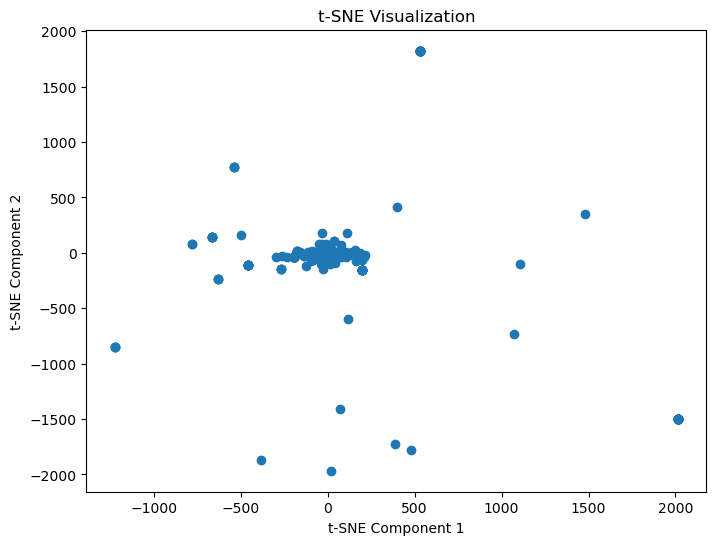

In [56]:
import matplotlib.pyplot as plt

# Create a scatter plot of the t-SNE results (2D representation)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

In [57]:
from sklearn.manifold import TSNE

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, n_jobs=-1, verbose=2)

X = df_structs.drop(columns=['url'])

# Fit and transform your high-dimensional data
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 535432 samples in 0.058s...
[t-SNE] Computed neighbors for 535432 samples in 104.250s...
[t-SNE] Computed conditional probabilities for sample 1000 / 535432
[t-SNE] Computed conditional probabilities for sample 2000 / 535432
[t-SNE] Computed conditional probabilities for sample 3000 / 535432
[t-SNE] Computed conditional probabilities for sample 4000 / 535432
[t-SNE] Computed conditional probabilities for sample 5000 / 535432
[t-SNE] Computed conditional probabilities for sample 6000 / 535432
[t-SNE] Computed conditional probabilities for sample 7000 / 535432
[t-SNE] Computed conditional probabilities for sample 8000 / 535432
[t-SNE] Computed conditional probabilities for sample 9000 / 535432
[t-SNE] Computed conditional probabilities for sample 10000 / 535432
[t-SNE] Computed conditional probabilities for sample 11000 / 535432
[t-SNE] Computed conditional probabilities for sample 12000 / 535432
[t-SNE] Computed conditional proba

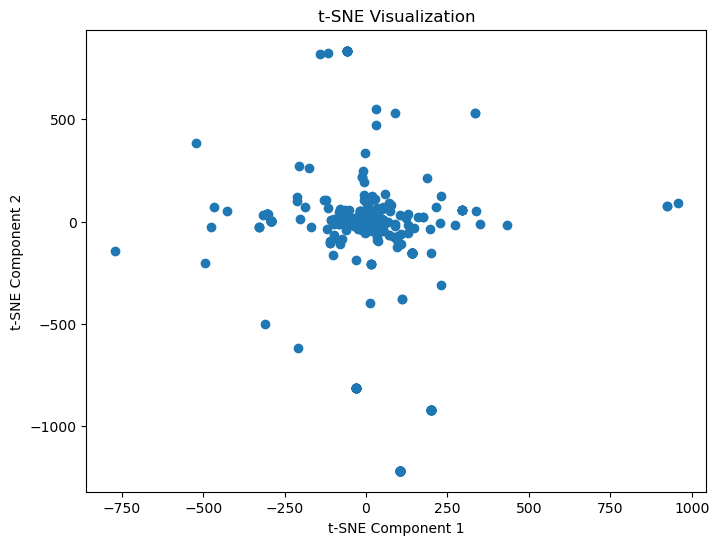

In [58]:
import matplotlib.pyplot as plt

# Create a scatter plot of the t-SNE results (2D representation)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

Looks cool and promising